# 주제 : 단순 선형회귀 (Simple Linear Regression)
---

Tensorflow의 기능을 이용하여, 선형회귀를 구현한다

### 문제 0. 라이브러리

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action = 'ignore')

### 문제 1. 텐서플로우 버전 확인

In [1]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [5]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.4 kB/s 
     |████████████████████████████████| 1.6 MB 45.3 MB/s 
     |████████████████████████████████| 5.8 MB 49.1 MB/s 
     |████████████████████████████████| 438 kB 56.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

### 문제 2. 데이터 만들기

In [2]:
# 임의 데이터 작성 : [공부 시간, 점수]
data = [[2,81],[4,93],[6,91],[8,97]]

### 문제 2. X, y 데이터로 분리

* 종속변수와 독립변수로 분리

In [6]:
# 파이썬의 리스트 내포 
X = [i[0] for i in data]
y = [i[1] for i in data]
X = np.array(X)
y = np.array(y)

### 문제 3. 시각화

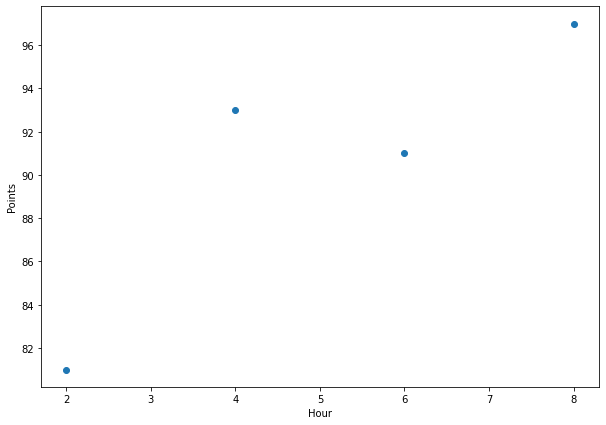

In [9]:
# 데이터의 산점도
plt.figure(figsize = (10,7))
plt.scatter(X,y)
plt.xlabel('Hour')
plt.ylabel('Points')
plt.show()


### 문제 4. 가설 

* 가설 : $ \hat{y}=Wx +b$

In [12]:
# 임의의 초기값 설정, 변수를 텐서플로우 변수로 정의하는 이유는 자동미분기능(GradientTape)을 사용하기 위함
W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W*X + b

In [13]:
hypothesis

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 4.5,  8.5, 12.5, 16.5], dtype=float32)>

Tensor에서 numpy array로 변환은 .numpy()함수를 사용합니다

In [14]:
# 초기값 확인
#Tensor에서 numpy array로 변환은 .numpy()함수 사용
W, W.numpy()


(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>, 2.0)

#### 가설의 시각화 

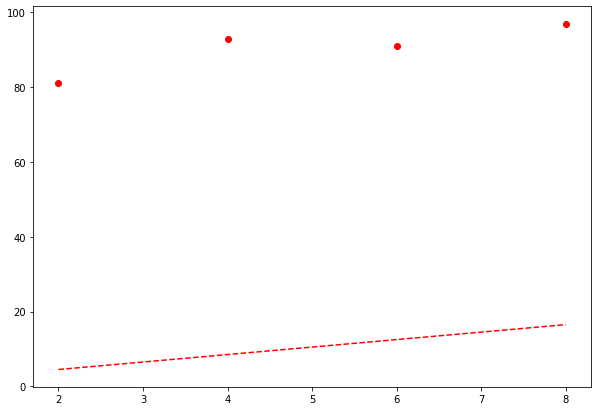

In [17]:
plt.figure(figsize=(10,7))
plt.plot(X, hypothesis.numpy(), 'r--')
plt.plot(X,y, 'ro')
plt.show()

### 6. 비용 함수 (Cost Function)

$$ \hat{y}=Wx +b$$
$$ cost(W)=\frac { 1 }{ m } \sum _{i=1}^{m}{ ({ y-\hat{y}_{ i } })^{ 2 } }  $$

In [19]:
# 현재 손실
cost = tf.reduce_mean(tf.square(hypothesis-y))
cost.numpy()

6408.75

### 7. 학습
#### 자동 미분 기능

* 텐서플로우의 자동미분 기능을 사용

In [21]:
# 손실함수의 미분값을 계산하세요
with tf.GradientTape() as type:
    hypothesis = W*X + b
    cost = tf.reduce_mean(tf.square(hypothesis-y))



In [22]:
# W와 b 계산값을 출력

W_grad, b_grad = type.gradient(cost,[W,b])
W_grad.numpy(), b_grad.numpy()


(-803.0, -160.0)

#### 가중치와 기울기 갱신

In [24]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=2.1>

In [25]:
# W와 b 계산값을 출력하세요

W.numpy(), b.numpy()

(10.03, 2.1)

#### 현재 상태 시각화

In [27]:
hypothesis = W*X + b

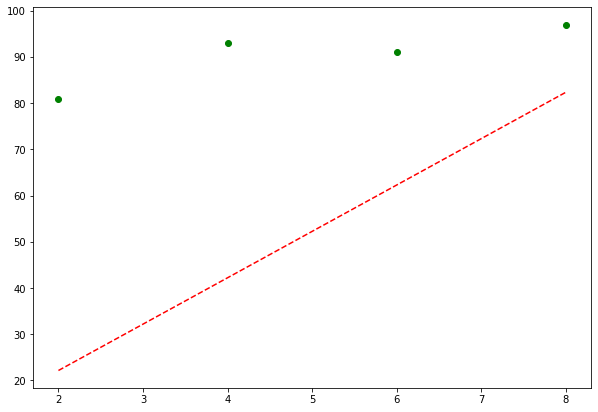

In [28]:
plt.figure(figsize =(10,7))
plt.plot(X, hypothesis.numpy(), 'r--')
plt.plot(X,y,'go')
plt.show()

### 8. 경사하강법 (Gradient Descent)

In [36]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)
learning_rate = 0.01
epochs = 2000

In [42]:
for i in range(epochs+1):
  with tf.GradientTape() as tape:
    hypothesis = W * X + b
    cost = tf.reduce_mean(tf.square(hypothesis - y))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    W.assign_sub(learning_rate + b_grad)
    if i % 10 == 0:
      print(f'{i:5} | W={W.numpy():4} | b={b.numpy():.4f} | cost = {cost :.6f}')

    0 | W= nan | b=0.5000 | cost = nan
   10 | W= nan | b=0.5000 | cost = nan
   20 | W= nan | b=0.5000 | cost = nan
   30 | W= nan | b=0.5000 | cost = nan
   40 | W= nan | b=0.5000 | cost = nan
   50 | W= nan | b=0.5000 | cost = nan
   60 | W= nan | b=0.5000 | cost = nan
   70 | W= nan | b=0.5000 | cost = nan
   80 | W= nan | b=0.5000 | cost = nan
   90 | W= nan | b=0.5000 | cost = nan
  100 | W= nan | b=0.5000 | cost = nan
  110 | W= nan | b=0.5000 | cost = nan
  120 | W= nan | b=0.5000 | cost = nan
  130 | W= nan | b=0.5000 | cost = nan
  140 | W= nan | b=0.5000 | cost = nan
  150 | W= nan | b=0.5000 | cost = nan
  160 | W= nan | b=0.5000 | cost = nan
  170 | W= nan | b=0.5000 | cost = nan
  180 | W= nan | b=0.5000 | cost = nan
  190 | W= nan | b=0.5000 | cost = nan
  200 | W= nan | b=0.5000 | cost = nan
  210 | W= nan | b=0.5000 | cost = nan
  220 | W= nan | b=0.5000 | cost = nan
  230 | W= nan | b=0.5000 | cost = nan
  240 | W= nan | b=0.5000 | cost = nan
  250 | W= nan | b=0.5000

#### 학습결과 시각화

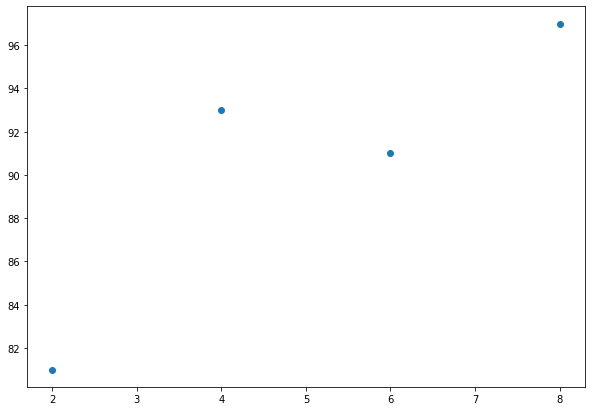

In [32]:
plt.figure(figsize=(10,7))
plt.plot(X,y,'o')
plt.plot(X,hypothesis.numpy(),'r--')
plt.show()

### 9. 예측하기

> * 5시간 공부하면 몇점 받을 수 있을까?

In [38]:
W.numpy(), b.numpy()

(nan, 0.5)

In [ ]:
(5* W+ b).numpy

끝